In [5]:
import json


def evaluate_result(generation_result_path: str, system_prompt: str, openai_client):
    # Construct prompt
    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": json.dumps(open(generation_result_path).read())}
    ]

    # Generate a completion
    completion = openai_client.chat.completions.create(
        # model="gpt-4-turbo",
        model="gpt-4o",
        response_format={"type": "json_object"},
        messages=messages
    )

    # Get the generated text
    result_string = completion.choices[0].message.content

    # Convert the generated text into a dictionary
    evaluation = json.loads(result_string)

    # Return the dictionary
    return evaluation

In [6]:
import os
import dotenv
from openai import OpenAI


# Load the environment variables
dotenv.load_dotenv()
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY')

# Create an instance of the OpenAI class
openai_api = OpenAI()

# Read the system prompt
with open('prompt.txt', 'r') as file:
    # Read the entire content of the file
    sys_prompt = file.read()

# Test tagging the education dictionary
result = evaluate_result(
    os.getenv('Test_FILE_PATH'),
    sys_prompt, 
    openai_api)

# Print the result
print(result)

{'valid_json': True, 'accuracy_rating': 8, 'assumption_rating': 7, 'justification_rating': 8, 'missing_info_rating': 6, 'over_generalization_rating': 5, 'confidence_score': 8, 'comments': "The generated JSON follows the required structure and is valid. The inferred industry and profession are accurate based on the company name and job title. The skills listed are relevant to a Mechanical Engineer role within a manufacturing or automation context, which is reasonable for Premier Automation. However, some skills like 'development' and 'automation' are slightly broad without more context. The tags are mostly relevant, but 'Pittsburgh area' might be considered too generic. Overall, the output is solid but could improve specificity in both skills and tags."}


In [13]:
import json
import os
import dotenv
from openai import OpenAI


# Load the environment variables
dotenv.load_dotenv()

# Create an instance of the OpenAI class
openai_api = OpenAI()

# Directory containing all files to process
results_directory = os.getenv('TAGS_FOLDER_PATH') + 'outputs_json/'

# Read the system prompt
with open('prompt.txt', 'r') as file:
    sys_prompt = file.read()

# List to hold all the results
all_results = []

# Iterate over all files in the results directory
for filename in os.listdir(results_directory):
    if filename.endswith(".json"):  # Adjust the file type if necessary
        file_path = os.path.join(results_directory, filename)
        # Evaluate the result for each file
        result = evaluate_result(file_path, sys_prompt, openai_api)
        # Append the result to the list
        all_results.append(result)

In [14]:
import json
import pandas as pd


# Print the number of results
print(len(all_results))

# Save the results to a JSON file
output_path = f'evaluation_{len(all_results)}_gpt_4o.json'
with open(output_path, 'w') as json_file:
    json.dump(all_results, json_file, indent=4)

# Save the results to a CSV file
eval_df = pd.DataFrame(all_results)
eval_df.to_csv(f'evaluation_{len(all_results)}_gpt_4o.csv', index=False)

600


In [2]:
import os
import dotenv
import pandas as pd


# Load the environment variables
dotenv.load_dotenv(dotenv.find_dotenv())

# Specify the columns you want to keep
columns_to_keep = [
    "valid_json",
    "accuracy_rating",
    "assumption_rating",
    "justification_rating",
    "missing_info_rating",
    "over_generalization_rating",
    "confidence_score",
    "comments"
]

# Load the evaluation results from the JSON file and filter to only include specified columns
data = pd.read_json(os.getenv('RESULT_JSON_PATH'))[columns_to_keep] 

print(data.head())

   valid_json  accuracy_rating  assumption_rating  justification_rating  \
0        True                8                  7                     8   
1        True                9                  8                     9   
2        True                9                  9                     9   
3        True                8                  7                     8   
4       False                3                  5                     4   

   missing_info_rating  over_generalization_rating  confidence_score  \
0                    6                           7                 7   
1                    8                           8                 8   
2                    8                           9                 9   
3                    6                           6                 8   
4                    6                           4                 3   

                                            comments  
0  The generated output is a valid JSON structure...  
1  The

#### Scores
*Scale of 1 to 10, where 1 indicates poor performance and 10 indicates excellent performance.*

**JSON Validity**<br>
Check if the generated output follows a valid JSON structure.

**Accuracy**<br>
Evaluate how accurate and relevant the generated tags and skills are based on the provided experience. Consider factors like job title, company, and description.

**Assumptions**<br>
Assess whether the model made reasonable assumptions or if it generated tags and skills that are far-fetched or not well-justified given the available information.

**Missing Information**<br>
Check if the model missed any important tags or skills that should have been included based on the experience.

**Over-generalization**<br>
Evaluate if the model generated overly generic or broad tags and skills that might not be directly relevant to the specific experience.

**Confidence**<br>
Provide an overall confidence score for the generated output, considering the accuracy, relevance, and justification of the tags and skills.

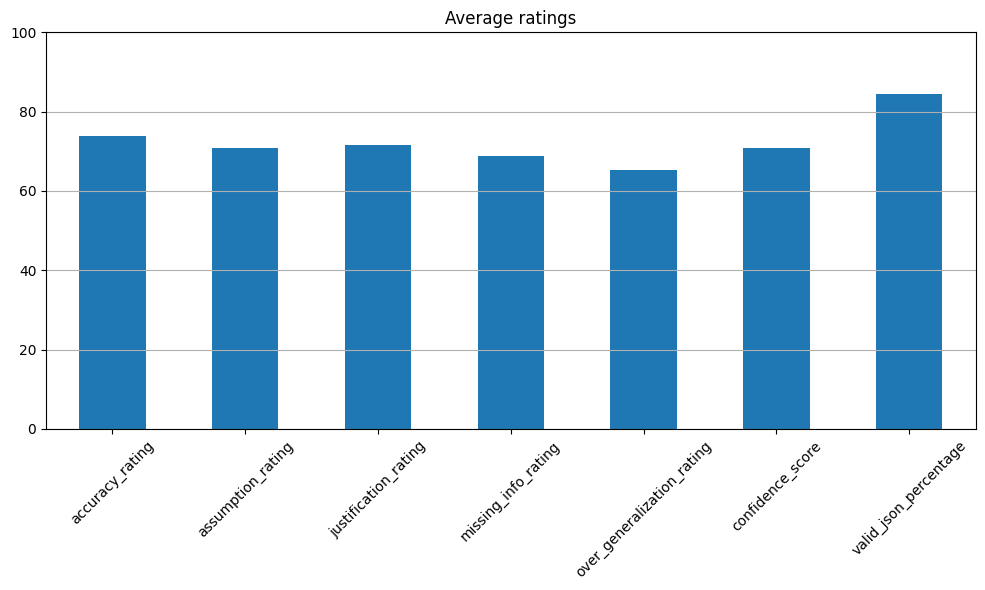

In [3]:
import matplotlib.pyplot as plt


# Calculate the averages for the ratings
average_ratings = data[columns_to_keep[1:7]].mean() * 10

# Calculate the percentage of valid_json being True
valid_json_percentage = data['valid_json'].mean() * 100

# Add the valid_json percentage to the average ratings
average_ratings['valid_json_percentage'] = valid_json_percentage

# Bar chart
plt.figure(figsize=(10, 6))
average_ratings.plot(kind='bar')
plt.ylim(0, 100)
plt.title('Average ratings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

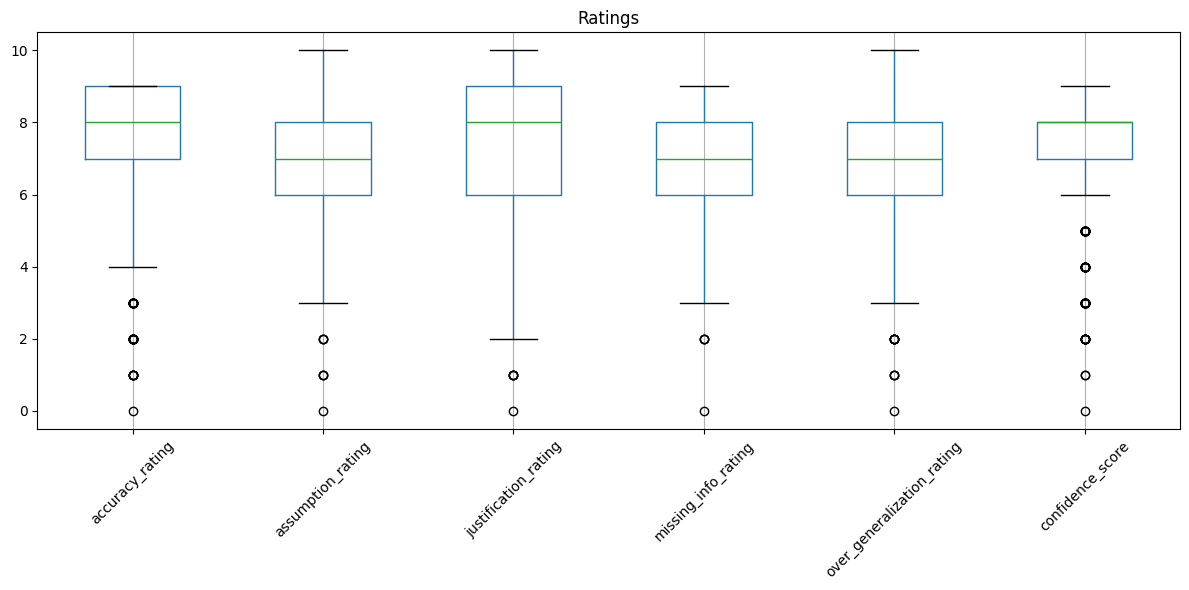

In [4]:
# Columns to plot
columns_to_plot = [
    "accuracy_rating",
    "assumption_rating",
    "justification_rating",
    "missing_info_rating",
    "over_generalization_rating",
    "confidence_score"
]

# Plotting the boxplot
plt.figure(figsize=(12, 6))
data[columns_to_plot].boxplot()
plt.title('Ratings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

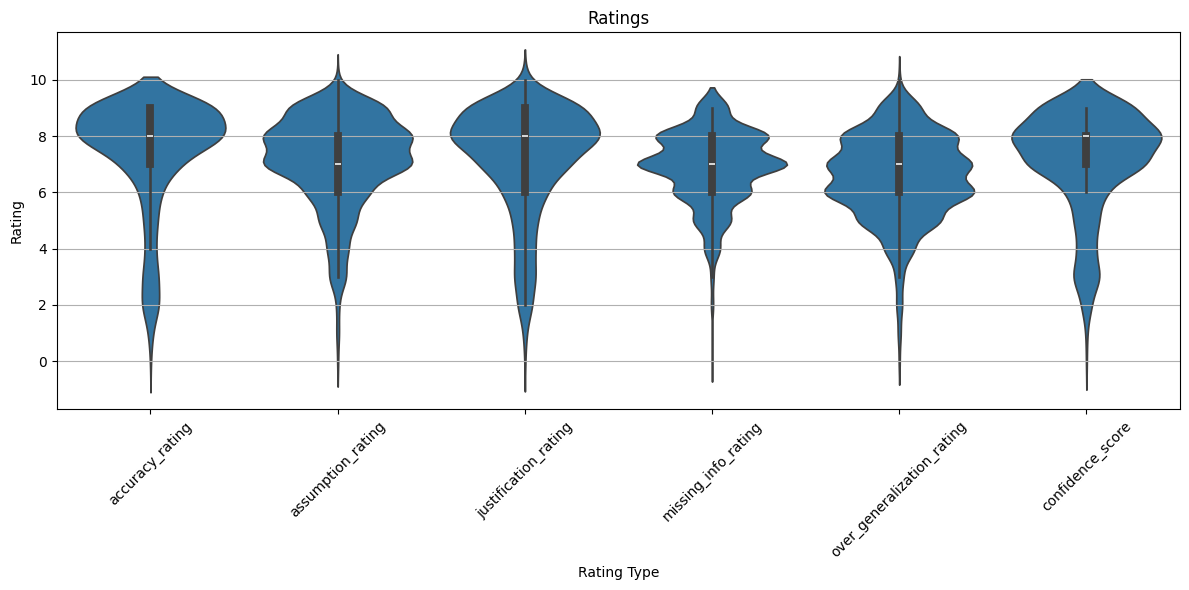

In [5]:
import seaborn as sns


# Convert DataFrame to long format for Seaborn
melted_data = data.melt(value_vars=columns_to_plot, var_name='Rating Type', value_name='Rating')

# Plotting the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Rating Type', y='Rating', data=melted_data, inner='box', density_norm='width')
plt.title('Ratings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()